<a href="https://colab.research.google.com/github/plaban1981/ZINDI_HACKATHON/blob/master/Zindi_Mental_Health_Keras_Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('/content/drive/My Drive/Zindi/Tech4MentalHealth/Train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Zindi/Tech4MentalHealth/Test.csv')

In [4]:
df_train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


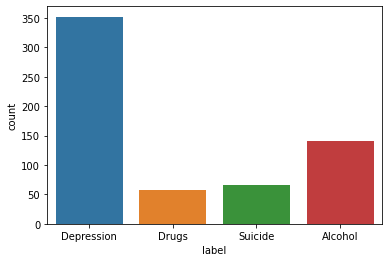

In [ ]:
sns.axes_style('whitegrid')
sns.countplot(df_train['label'])

In [ ]:
print('# of Training Samples: {}'.format(len(df_train)))
print('# of Test Samples: {}'.format(len(df_test)))

num_classes = len(np.unique(df_train['label']))
print('# of Classes: {}'.format(num_classes))

# of Training Samples: 616
# of Test Samples: 309
# of Classes: 4


In [6]:
import re
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = df_train['text'].apply(lambda x : preprocess_text(x))
test = df_test['text'].apply(lambda x : preprocess_text(x))
y = df_train['label']

In [ ]:
X.head()

0                I feel that it was better dieAm happy
1                           Why do get hallucinations 
2    I am stresseed due to lack of financial suppor...
3                               Why is life important 
4    How could be helped to go through the depression 
Name: text, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb_enc = lb.fit_transform(y)
print(lb.classes_)

['Alcohol' 'Depression' 'Drugs' 'Suicide']


In [ ]:
from collections import Counter
def wrd_list(text):
  wrds = []
  for i in text.values:
    for word in i.split(" "):
      wrds.append(word)
  return wrds

In [ ]:
train_word_dict = Counter(wrds)
len(train_word_dict)

1031

In [ ]:
test_word_dict = Counter(wrd_list(df_test['text']))
len(test_word_dict)

691

In [ ]:
vocab_size = len(train_word_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,lb_enc,test_size=0.15,random_state=10,stratify=y)

# Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_sequences(X_train+X_test)
trian_x = tokenizer.sequences_to_matrix(X_train,'tfidf')
test_x = tokenizer.sequences_to_matrix(X_test,'tfidf')

In [ ]:
trian_x.shape,test_x.shape

((523, 1031), (93, 1031))

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index 

{}

In [ ]:
max_words = 5000

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)



In [ ]:
len(X_train)

523

In [ ]:
y_train

array([3, 3, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 3, 1, 1, 3, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 3, 3, 1,
       0, 2, 1, 0, 1, 1, 1, 2, 3, 1, 2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 0, 1, 3, 0, 1, 2, 3, 1, 1, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 3, 0, 1, 1, 3, 1,
       1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 3,
       0, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 2, 1, 1, 2,
       1, 0, 0, 1, 0, 0, 1, 1, 3, 2, 1, 0, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1,
       0, 0, 1, 3, 0, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 0, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 3, 0, 3, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0,
       3, 1, 3, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 3,

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape,y_test.shape

((523, 4), (93, 4))

In [ ]:
print(X_train[0])
print(len(X_train[0]))

print(y_train[0])
print(len(y_train[0]))

[ 10  63 138 101   2  27 139   6  11 331  52  18   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
200
[0. 0. 0. 1.]
4


In [ ]:
trian_x.shape,y_train.shape

((523, 1031), (523, 4))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Embedding,LSTM,Bidirectional,Flatten
from keras.layers.pooling import GlobalAvgPool1D

model = Sequential()
#model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Embedding(vocab_size,32))
model.add(GlobalAvgPool1D())
#model.add(LSTM(32,return_sequences=True))
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 32)          32992     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               4224      
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 516       
_________________________________________________________________
activation_18 (Activation)   (None, 4)                 0         
Total params: 37,732
Trainable params: 37,732
Non-trainable params: 0
_________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.metrics_names)

['loss', 'accuracy']


In [ ]:
batch_size = 128
epochs = 5

history = model.fit(trian_x, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
score = model.evaluate(test_x, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 470 samples, validate on 53 samples
Epoch 1/5
470/470 [==============================] - 0s 305us/step - loss: 1.3813 - accuracy: 0.2894 - val_loss: 1.3626 - val_accuracy: 0.6038
Epoch 2/5
470/470 [==============================] - 0s 66us/step - loss: 1.3589 - accuracy: 0.5681 - val_loss: 1.3399 - val_accuracy: 0.6038
Epoch 3/5
470/470 [==============================] - 0s 66us/step - loss: 1.3387 - accuracy: 0.5681 - val_loss: 1.3166 - val_accuracy: 0.6038
Epoch 4/5
470/470 [==============================] - 0s 70us/step - loss: 1.3174 - accuracy: 0.5681 - val_loss: 1.2917 - val_accuracy: 0.6038
Epoch 5/5
93/93 [==============================] - 0s 22us/step
Test loss: 1.2787342071533203
Test accuracy: 0.5698924660682678


In [ ]:
model.predict_proba(test_x)

array([[0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518, 0.24727796, 0.24727158],
       [0.2485153 , 0.25693518,

## Using TFIDFVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = [word for word in set(stopwords.words('english'))]

In [ ]:
tfidf = TfidfVectorizer(max_features=200,stop_words=stop_words,ngram_range=(1,1) )
tfidf_vec =  tfidf.fit_transform(df_train['text'])

In [ ]:
tfidf_mat = tfidf_vec.toarray()

In [ ]:
tfidf_mat.shape

(616, 200)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_mat,columns=tfidf.get_feature_names())

In [ ]:
tfidf_df.head()

,abuse,addict,addicted,addiction,alcohol,alcoholism,alive,alone,always,anyone,assistance,avoid,away,back,bad,best,better,bhang,body,causes,challenges,close,come,commiting,company,consumption,control,cope,could,counselling,deal,dealing,death,depressed,depression,difficult,discouraged,dont,drink,drinking,...,study,suffer,suicidal,suicide,support,survive,take,taking,talk,talking,things,think,thinking,thought,thoughts,time,times,unfair,unloved,unwanted,unworthy,use,used,using,want,wanted,wanting,wasted,way,ways,weaker,weed,went,withdraw,without,world,worth,would,young,youths
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.569603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.536283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476517,0.0,0.0,0.0,0.0,0.0,0.342494,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df.shape

(616, 200)

In [ ]:
y

0      Depression
1           Drugs
2      Depression
3         Suicide
4      Depression
          ...    
611       Alcohol
612       Suicide
613       Alcohol
614    Depression
615    Depression
Name: label, Length: 616, dtype: object

In [ ]:
tfidf_df['label'] = lb_enc

In [ ]:
tfidf_df.head()

,abuse,addict,addicted,addiction,alcohol,alcoholism,alive,alone,always,anyone,assistance,avoid,away,back,bad,best,better,bhang,body,causes,challenges,close,come,commiting,company,consumption,control,cope,could,counselling,deal,dealing,death,depressed,depression,difficult,discouraged,dont,drink,drinking,...,suffer,suicidal,suicide,support,survive,take,taking,talk,talking,things,think,thinking,thought,thoughts,time,times,unfair,unloved,unwanted,unworthy,use,used,using,want,wanted,wanting,wasted,way,ways,weaker,weed,went,withdraw,without,world,worth,would,young,youths,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.569603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.536283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476517,0.0,0.0,0.0,0.0,0.0,0.342494,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
X = tfidf_df.drop('label',axis=1)
y = tfidf_df['label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,lb_enc,test_size=0.15,random_state=10,stratify=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svm_model = RandomizedSearchCV(SVC(probability=True), params_grid, cv=5)
svm_model.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']},
                                        {'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbos

In [ ]:
svm_model.best_estimator_


SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_model.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, random_state = 42, shuffle = True)
scores = cross_val_score(svm_model.best_estimator_, X,y, cv = kf)

print('Cross-validation scores:', scores)
print('Cross-validation accuracy: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))

Cross-validation scores: [0.74193548 0.88709677 0.75806452 0.90322581 0.83870968 0.87096774
 0.86885246 0.78688525 0.8852459  0.80327869]
Cross-validation accuracy: 0.8344 (+/- 0.1100)


In [ ]:
from sklearn.metrics import log_loss,confusion_matrix,accuracy_score,f1_score
y_pred = svm_model.best_estimator_.predict(X_test)
y_pred_proba = svm_model.best_estimator_.predict_proba(X_test)
log_loss(y_test,y_pred_proba,labels=[0,1,2,3])

0.2561848945789972

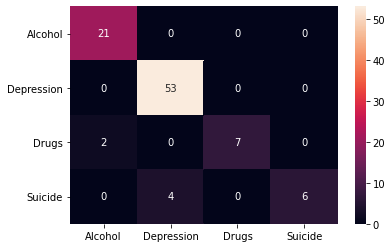

In [ ]:
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True, fmt='g', xticklabels=lb.classes_, yticklabels=lb.classes_)

In [ ]:
accuracy_score(y_test,y_pred)

0.9354838709677419

## Convert test text

In [ ]:
tfidf_vec_test =  tfidf.fit_transform(df_test['text'])
tfidf_mat_test = tfidf_vec_test.toarray()

In [ ]:
tfidf_mat_test.shape

(309, 200)

In [ ]:
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(tfidf_mat_test)
y_pred_proba = final_model.predict_proba(tfidf_mat_test)
Y_pred_label = list(lb.inverse_transform(Y_pred))

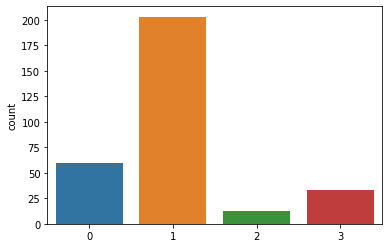

In [ ]:
sns.countplot(Y_pred)

In [ ]:
df_predictions = pd.DataFrame(y_pred_proba,columns=lb.classes_)
results_df = pd.concat([df_test,df_predictions],axis=1)
results_df = results_df[['ID','Depression','Alcohol','Suicide','Drugs']]
results_df.to_csv('tfidf_SVM_model.csv',index=False)

In [ ]:
results_df.shape

(309, 5)

In [ ]:
results_df.head()

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0.540657,0.276809,0.072640,0.109895
1,03BMGTOK,0.866460,0.023780,0.090529,0.019231
2,03LZVFM6,0.973449,0.009143,0.009854,0.007553
3,0EPULUM5,0.543166,0.023302,0.428485,0.005046
4,0GM4C5GD,0.026613,0.007353,0.019472,0.946561


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kf = KFold(n_splits=10, random_state = 42, shuffle = True)
scores = cross_val_score(lr, X,y, cv = kf)

print('Cross-validation scores:', scores)
print('Cross-validation accuracy: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))

Cross-validation scores: [0.75806452 0.83870968 0.79032258 0.87096774 0.83870968 0.91935484
 0.80327869 0.80327869 0.91803279 0.80327869]
Cross-validation accuracy: 0.8344 (+/- 0.1025)


In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
log_loss(y_test,y_pred_proba,labels=[0,1,2,3])

0.48060353662510374

In [ ]:
accuracy_score(y_test,y_pred)

0.8817204301075269

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=10, objective ='multi:softmax',max_depth =12, num_classes = [0,1,2,3],n_estimators=300,n_jobs=-1, verbosity=0)

In [ ]:
kf = KFold(n_splits=10, random_state = 42, shuffle = True)
scores = cross_val_score(model, X,y, cv = kf)

print('Cross-validation scores:', scores)
print('Cross-validation accuracy: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))

Cross-validation scores: [0.79032258 0.85483871 0.77419355 0.80645161 0.82258065 0.83870968
 0.80327869 0.7704918  0.8852459  0.80327869]
Cross-validation accuracy: 0.8149 (+/- 0.0685)


## Multi label text classification - OneClassVersusRest

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

# Number of texts in each category

In [9]:
counts = []

for i in df_train.label.unique().tolist():
    counts.append((i, df_train[df_train['label'] ==i]['text'].count()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,Depression,352
1,Drugs,58
2,Suicide,66
3,Alcohol,140


# The distribution of the number of words in comment texts.
https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Multi%20label%20text%20classification.ipynb

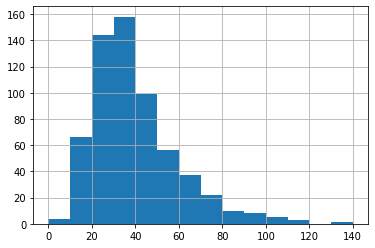

In [10]:
lens = df_train.text.str.len()
lens.hist(bins = np.arange(0,150,10))

# Create a function to clean the text

In [11]:
import re
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    text = sentence
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')

    return text

# Clean text column

In [12]:
df_train['text'] = df_train['text'].apply(lambda x: preprocess_text(x) )
df_test['text'] = df_test['text'].apply(lambda x: preprocess_text(x) )

In [13]:
df_train.head()

,ID,text,label
0,SUAVK39Z,i feel that it was better dieam happy,Depression
1,9JDAGUV3,why do get hallucinations,Drugs
2,419WR1LQ,i am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,why is life important,Suicide
4,FYC0FTFB,how could be helped to go through the depression,Depression



# Split to train and test sets

In [19]:
df_categories = pd.get_dummies(df_train['label'])
df_train_new = pd.concat([df_train.drop('label',axis=1),df_categories],axis=1)

In [20]:
df_train_new.head()

,ID,text,Alcohol,Depression,Drugs,Suicide
0,SUAVK39Z,i feel that it was better dieam happy,0,1,0,0
1,9JDAGUV3,why do get hallucinations,0,0,1,0
2,419WR1LQ,i am stresseed due to lack of financial suppor...,0,1,0,0
3,6UY7DX6Q,why is life important,0,0,0,1
4,FYC0FTFB,how could be helped to go through the depression,0,1,0,0


In [28]:
train, test = train_test_split(df_train_new, random_state=42, test_size=0.15, shuffle=True)

In [30]:
X_train = train.text
X_test = test.text
print(X_train.shape)
print(X_test.shape)

(523,)
(93,)


In [31]:
train.head()

,ID,text,Alcohol,Depression,Drugs,Suicide
81,F6LTQ978,how to stop alcohol,1,0,0,0
318,VVC47SJA,how can stop,1,0,0,0
228,D64IPYOU,how to manage my relationship,0,0,0,1
63,5I2N159N,who could be the reason for depression,0,1,0,0
250,WBGFUUCK,how can be helped to come out of depression,0,1,0,0


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [95]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [100]:
categories = df_train['label'].unique().tolist()
losses= []
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    cv_loss = np.mean(cross_val_score(NB_pipeline, X_train, train[category], cv=5, scoring='neg_log_loss'))
    losses.append(cv_loss)
    print('CV Log_loss score for class {} is {}'.format(category, cv_loss))

... Processing Depression
Test accuracy is 0.8709677419354839
CV Log_loss score for class Depression is -0.32613826687348013
... Processing Drugs
Test accuracy is 0.8709677419354839
CV Log_loss score for class Drugs is -0.1920531552238804
... Processing Suicide
Test accuracy is 0.8817204301075269
CV Log_loss score for class Suicide is -0.26210299167708007
... Processing Alcohol
Test accuracy is 0.9354838709677419
CV Log_loss score for class Alcohol is -0.25303526762511286


# Linear SVC

In [49]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

In [102]:
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    

... Processing Depression
Test accuracy is 0.9032258064516129
... Processing Drugs
Test accuracy is 0.946236559139785
... Processing Suicide
Test accuracy is 0.9032258064516129
... Processing Alcohol
Test accuracy is 0.946236559139785


In [103]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False), n_jobs=1)),
            ])

In [113]:
losses =[]
auc = []
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    svc_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = svc_pipeline.predict(X_test)
    print(len(prediction))
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    cv_loss = np.mean(cross_val_score(svc_pipeline, X_train, train[category], cv=5, scoring='neg_log_loss'))
    losses.append(cv_loss)
    print('CV Log_loss score for class {} is {}'.format(category, cv_loss))
 
    y_pred = svc_pipeline.predict(X_test)
    y_pred_prob = svc_pipeline.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(test[category], y_pred_prob)
    auc.append(auc_score)
    print("CV ROC_AUC score {}\n".format(auc_score))
    
    print(confusion_matrix(test[category] ,y_pred))
    print(classification_report(test[category], y_pred))

... Processing Depression
93
Test accuracy is 0.8817204301075269
CV Log_loss score for class Depression is -0.29284629380207544
CV ROC_AUC score 0.9435185185185185

[[39  6]
 [ 5 43]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.88      0.90      0.89        48

    accuracy                           0.88        93
   macro avg       0.88      0.88      0.88        93
weighted avg       0.88      0.88      0.88        93

... Processing Drugs
93
Test accuracy is 0.946236559139785
CV Log_loss score for class Drugs is -0.10761003856761002
CV ROC_AUC score 0.918724279835391

[[81  0]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       1.00      0.58      0.74        12

    accuracy                           0.95        93
   macro avg       0.97      0.79      0.85        93
weighted avg       0.95      0.95      0.94  

In [117]:
x = df_train_new['text']
y = df_train_new.iloc[:, 2:6]  

In [118]:
y

,Alcohol,Depression,Drugs,Suicide
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
611,1,0,0,0
612,0,0,0,1
613,1,0,0,0
614,0,1,0,0


# Hyperparameter tuning

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [146]:
svc_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'clf__estimator__C', 'clf__estimator__break_ties', 'clf__estimator__cache_size', 'clf__estimator__class_weight', 'clf__estimator__coef0', 'clf__estimator__decision_function_shape', 'clf__estimator__degree', 'clf__estimator__gamma', 'clf__estimator__kernel', 'clf__estimator__max_iter', 'clf__estimator__probability', 'clf__estimator__random_state', 'clf__estimator__shrinking', 'clf__estimator__tol', 'clf__estimator__verbose', 'clf__estimator', 'clf__n_jobs'])

In [149]:
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV

svc_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(SVC( probability=True, random_state=10)))
            ])


params_grid = [{'clf__estimator__kernel': ['rbf'], 'clf__estimator__gamma': [1e-3, 1e-4],
                     'clf__estimator__C': [1, 10, 100, 1000]},
                    {'clf__estimator__kernel': ['linear'], 'clf__estimator__C': [1, 10, 100, 1000]}]

grid = RandomizedSearchCV(svc_pipeline, params_grid, cv=5)

In [150]:
grid3 = grid.fit(X_train, y_train)

In [151]:
grid3.best_estimator_

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all'...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=SVC(C=1, break_ties=False,
                                      

In [153]:
print(grid3.best_estimator_.named_steps['clf'])
print(grid3.best_estimator_.named_steps['tfidf'])

OneVsRestClassifier(estimator=SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=True, random_state=10,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as',

In [154]:
grid3.best_score_

0.7845186559472273

In [155]:
predicted_y_test = grid3.predict(X_test)

In [157]:
len(predicted_y_test)

124

In [162]:
df_test.shape

(309, 2)

In [165]:
pred_proba = grid3.predict_proba(df_test.text)

In [166]:
pred_proba

array([[0.2832774 , 0.29821283, 0.0133486 , 0.08485856],
       [0.03821878, 0.95877238, 0.01349239, 0.02633846],
       [0.00615276, 0.99999867, 0.01068921, 0.00782259],
       ...,
       [0.03824355, 0.2103729 , 0.031413  , 0.42347165],
       [0.00104301, 0.01119116, 1.        , 0.02541389],
       [0.92423123, 0.04575085, 0.01339458, 0.11829783]])

In [167]:
df_pred = pd.DataFrame(pred_proba,columns=lb.classes_)

In [168]:
df_pred.head()

,Alcohol,Depression,Drugs,Suicide
0,0.283277,0.298213,0.013349,0.084859
1,0.038219,0.958772,0.013492,0.026338
2,0.006153,0.999999,0.010689,0.007823
3,0.004847,0.944520,0.041836,0.135305
4,0.291038,0.016608,0.827235,0.061134


In [169]:
df_test = pd.concat([df_test,df_pred],axis=1)
df_test.head()

,ID,text,Alcohol,Depression,Drugs,Suicide
0,02V56KMO,how to overcome bad feelings and emotions,0.283277,0.298213,0.013349,0.084859
1,03BMGTOK,i feel like giving up in life,0.038219,0.958772,0.013492,0.026338
2,03LZVFM6,i was so depressed feel like got no strength t...,0.006153,0.999999,0.010689,0.007823
3,0EPULUM5,i feel so low especially since had no one to t...,0.004847,0.944520,0.041836,0.135305
4,0GM4C5GD,can be successful when am drug addict,0.291038,0.016608,0.827235,0.061134


In [172]:
df_test.tail()

,ID,text,Alcohol,Depression,Drugs,Suicide
304,Z9A6ACLK,yes,0.081365,0.686701,0.051472,0.093411
305,ZDUOIGKN,my girlfriend dumped me,0.053474,0.500000,0.035953,0.363831
306,ZHQ60CCH,how can go back to being my old self,0.038244,0.210373,0.031413,0.423472
307,ZVIJMA4O,is it true bhang is medicinal,0.001043,0.011191,1.000000,0.025414
308,ZYIFAY98,how can overcome the problem,0.924231,0.045751,0.013395,0.118298


In [170]:
df_sub = df_test[['ID','Depression','Alcohol','Suicide','Drugs']]

In [171]:
df_sub.shape

(309, 5)

In [173]:
df_sub.to_csv('oneclassclassifier.csv',index=False)

In [ ]:
#zindi score : 0.58530036290986

## Logistic Regression

In [36]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Depression
Test accuracy is 0.8494623655913979
... Processing Drugs
Test accuracy is 0.9032258064516129
... Processing Suicide
Test accuracy is 0.8924731182795699
... Processing Alcohol
Test accuracy is 0.946236559139785


https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments